# About the Dataset
Sprocket Central Pty Ltd is a company that specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 
Using the existing 3 datasets (Customer demographic, customer address and transactions), the aim is to analyze and recommend 1000 customers that should be targeted to drive the most value for the organisation. 

IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)

# LOADING THE DATASETS

In [2]:
transactions= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "Transactions", header = 1)

In [3]:
customer_demographic= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "CustomerDemographic", header = 1)

C:\Users\User\AppData\Local\Temp\ipykernel_7628\2547599561.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customer_demographic= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "CustomerDemographic", header = 1)


In [4]:
customer_address=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "CustomerAddress", header = 1)

MERGING THE 3 DATASETS ON CUSTOMER_ID

In [5]:
df= customer_demographic.merge(transactions, on= "customer_id").merge(customer_address)

# DATA CLEANING AND WRANGLING

Analysing the Null Values

In [6]:
df.isna().sum()

customer_id                               0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
default                                1451
owns_car                                  0
tenure                                  446
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                              0
brand                                   195
product_line                            195
product_class                           195
product_size                            195
list_price                      

In [7]:
for i in df.columns:
    rate= df[i].isna().sum()/len(df)*100
    if rate > 0:
        print("The Percentage of null values in {} is {}%".format(i, round(rate)))

The Percentage of null values in last_name is 3%
The Percentage of null values in DOB is 2%
The Percentage of null values in job_title is 12%
The Percentage of null values in job_industry_category is 16%
The Percentage of null values in default is 7%
The Percentage of null values in tenure is 2%
The Percentage of null values in online_order is 2%
The Percentage of null values in brand is 1%
The Percentage of null values in product_line is 1%
The Percentage of null values in product_class is 1%
The Percentage of null values in product_size is 1%
The Percentage of null values in standard_cost is 1%
The Percentage of null values in product_first_sold_date is 1%


#TREATING THE NULL VALUES

#Drop the null values less than 5%

#Replace the null values above 10% with the mode

In [8]:
df.dropna(subset=["last_name", "DOB", "tenure", "online_order", "brand", "product_line", "product_class", "product_size", "standard_cost", "product_first_sold_date"], axis= 0, inplace= True)

In [9]:
df["job_title"].fillna(df["job_title"].mode()[0], inplace= True)
df["job_industry_category"].fillna(df["job_industry_category"].mode()[0], inplace= True)
df["default"].fillna(df["default"].mode()[0], inplace= True)

In [10]:
df.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_so

EXTRACTING THE DEAD FROM THE ALIVE

DROPPING THE COLUMNS THAT ARE NOT NEEDED FOR THE ANALYSIS

In [11]:
df_alive=df[df["deceased_indicator"]== "N"].drop(columns=["deceased_indicator", "default", "country"])
df_alive.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,New South Wales,10
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,060 Morning Avenue,2016,New South Wales,10
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,060 Morning Avenue,2016,New South Wales,10
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,060 Morning Avenue,2016,New South Wales,10
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,060 Morning Avenue,2016,New South Wales,10


Replace the gender symbol to make it unique

In [12]:
df_alive["gender"].value_counts()

Female    9426
Male      8910
F           11
U            8
Femal        7
M            6
Name: gender, dtype: int64

In [13]:
df_alive["gender"]= df_alive["gender"].str.replace("Female", "F", regex= True)
df_alive["gender"]= df_alive["gender"].str.replace("Male", "M", regex= True)
df_alive["gender"]= df_alive["gender"].str.replace("U", "F", regex= True)
df_alive["gender"]= df_alive["gender"].str.replace("Femal", "F", regex= True)

In [14]:
df_alive["gender"].value_counts()

F    9452
M    8916
Name: gender, dtype: int64

In [15]:
df_alive["state"].unique()

array(['New South Wales', 'VIC', 'QLD', 'NSW', 'Victoria'], dtype=object)

In [16]:
df_alive["state"]= df_alive["state"].str.replace("New South Wales", "NSW", regex= True)
df_alive["state"]= df_alive["state"].str.replace("Victoria", "VIC", regex= True)

In [17]:
df_alive["state"].unique()

array(['NSW', 'VIC', 'QLD'], dtype=object)

In [18]:
df_alive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18368 entries, 0 to 19967
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          18368 non-null  int64         
 1   first_name                           18368 non-null  object        
 2   last_name                            18368 non-null  object        
 3   gender                               18368 non-null  object        
 4   past_3_years_bike_related_purchases  18368 non-null  int64         
 5   DOB                                  18368 non-null  datetime64[ns]
 6   job_title                            18368 non-null  object        
 7   job_industry_category                18368 non-null  object        
 8   wealth_segment                       18368 non-null  object        
 9   owns_car                             18368 non-null  object        
 10  tenure    

Creating Age and Age Cateory from DOB

In [19]:
from datetime import date
def age_calc(df_alive):
    today= date.today()
    age= today.year- df_alive["DOB"].year- ((today.month, today.day) < (df_alive["DOB"].month, df_alive["DOB"].day))
    return age

In [20]:
df_alive["age"]= df_alive.apply(age_calc, axis= 1)

In [21]:
#drop the DOB
df_alive.drop("DOB",axis= 1, inplace = True)

In [22]:
#calculating the age category
age_min= df_alive["age"].min()
age_q1= round(df_alive["age"].quantile(0.25))
age_median= round(df_alive["age"].quantile(0.5))
age_q3= round(df_alive["age"].quantile(0.75))
age_max=df_alive["age"].max()
print(age_min,",", age_q1,",", age_median,",", age_q3,",", age_max)

21 , 36 , 45 , 55 , 179


In [23]:
def age_cat(df_alive):
    if df_alive["age"] > age_q3:
        return "Elderly"
    elif df_alive["age"] <= age_q3 and df_alive["age"] > age_median:
        return "Adult"
    elif df_alive["age"] <= age_median and df_alive["age"] > age_q1:
        return "Young Adult"
    else:
        return "Young"

AGE CATEGORY INDICATOR
YOUNG = customers younger than or equal to 21yrs
YOUNG ADULT= customers older than 36yrs but younger or are 45yrs
ADULT= customers older than 45yrs but younger or are 55yrs
ELDERLY= customers older than 55yrs

In [24]:
df_alive["age_category"]= df_alive.apply(age_cat, axis= 1)
df_alive

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,property_valuation,age,age_category
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,NSW,10,69,Elderly
1,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,060 Morning Avenue,2016,NSW,10,69,Elderly
2,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,060 Morning Avenue,2016,NSW,10,69,Elderly
3,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,060 Morning Avenue,2016,NSW,10,69,Elderly
4,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,060 Morning Avenue,2016,NSW,10,69,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,3500,Josy,Fleeman,F,71,Social Worker,Entertainment,Affluent Customer,No,17.0,6309,69,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,9491 Green Ridge Terrace,2100,NSW,10,55,Adult
19964,3500,Josy,Fleeman,F,71,Social Worker,Entertainment,Affluent Customer,No,17.0,8416,74,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,9491 Green Ridge Terrace,2100,NSW,10,55,Adult
19965,3500,Josy,Fleeman,F,71,Social Worker,Entertainment,Affluent Customer,No,17.0,8562,33,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,9491 Green Ridge Terrace,2100,NSW,10,55,Adult
19966,3500,Josy,Fleeman,F,71,Social Worker,Entertainment,Affluent Customer,No,17.0,14870,22,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,9491 Green Ridge Terrace,2100,NSW,10,55,Adult


# Creating the RFM table

FREQUENCY

In [25]:
freq= df_alive.groupby(["customer_id"])[["product_id"]].count()
freq

,product_id
customer_id,
1,11
2,3
5,6
6,5
7,3
...,...
3496,4
3497,3
3498,6


RECENCY

In [26]:
compare_date=df_alive["transaction_date"].max()
compare_date

Timestamp('2017-12-30 00:00:00')

In [27]:
recency=df_alive.groupby(["customer_id"]).agg({"transaction_date":lambda x:((compare_date-x.max()).days)})
recency

,transaction_date
customer_id,
1,7
2,128
5,16
6,64
7,253
...,...
3496,256
3497,52
3498,127


MONETARY

In [28]:
df_alive["profit"]= df_alive["list_price"] - df_alive["standard_cost"]
df_alive["profit"]

0        110.56
1        751.02
2        189.28
3         90.10
4         17.87
          ...  
19963    198.22
19964    827.16
19965    144.26
19966     15.08
19967    583.27
Name: profit, Length: 18368, dtype: float64

In [29]:
monetary= df_alive.groupby(["customer_id"])[["profit"]].sum()
monetary

,profit
customer_id,
1,3018.09
2,2226.26
5,2394.94
6,3946.55
7,220.11
...,...
3496,2045.84
3497,1648.32
3498,3147.33


In [30]:
recency.columns= ["recency"]
freq.columns=["frequency"]
monetary.columns= ["monetary"]
rfm_table= pd.concat([recency,freq, monetary], axis= 1)
rfm_table

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
5,16,6,2394.94
6,64,5,3946.55
7,253,3,220.11
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


# CALCULATING THE RFM VALUE BY GENERATING THE R_SCORE, F_SCORE AND M_SCORE

F_SCORE

In [31]:
freq_min= rfm_table["frequency"].min()
freq_q1= rfm_table["frequency"].quantile(0.25)
freq_median= rfm_table["frequency"].quantile(0.5)
freq_q3= rfm_table["frequency"].quantile(0.75)
freq_max=rfm_table["frequency"].max()
print(freq_min,",", freq_q1,",", freq_median,",", freq_q3,",", freq_max)

1 , 4.0 , 5.0 , 7.0 , 14


In [32]:
#the highest frequency has the highest f-score while the lowest frequency has the lowest f_score
def f_score(rfm_table):
    if rfm_table["frequency"] > freq_q3:
        return 4
    elif rfm_table["frequency"] <= freq_q3 and rfm_table["frequency"] > freq_median:
        return 3
    elif rfm_table["frequency"] <= freq_median and rfm_table["frequency"] > freq_q1:
        return 2
    else:
        return 1

R_SCORE

In [33]:
recency_min= rfm_table["recency"].min()
recency_q1= rfm_table["recency"].quantile(0.25)
recency_median= rfm_table["recency"].quantile(0.5)
recency_q3= rfm_table["recency"].quantile(0.75)
recency_max= rfm_table["recency"].max()

print(recency_min,",", recency_q1,",", recency_median,",", recency_q3,",", recency_max)

0 , 18.0 , 45.0 , 87.0 , 353


In [34]:
#the most recent(lowest recency value i.e far from recent) has the highest r_score and vice versa
def r_score(rfm_table):
    if rfm_table["recency"] > recency_q3:
        return 1
    elif rfm_table["recency"] <= recency_q3 and rfm_table["recency"] > recency_median:
        return 2
    elif rfm_table["recency"] <= recency_median and rfm_table["recency"] > recency_q3:
        return 3
    else:
        return 4

M- SCORE

In [35]:
monetary_min= round(rfm_table["monetary"].min(),2)
monetary_q1= rfm_table["monetary"].quantile(0.2)
monetary_median= rfm_table["monetary"].quantile(0.5)
monetary_q3= rfm_table["monetary"].quantile(0.75)
monetary_max= round(rfm_table["monetary"].max(),2)

print(monetary_min,",", monetary_q1,",", monetary_median,",", monetary_q3,",", monetary_max)

15.08 , 1573.1 , 2788.69 , 4113.04 , 11668.95


In [36]:
#the highest monetary has the highest m-score while the lowest monetary has the lowest m_score
def m_score(rfm_table):
    if rfm_table["monetary"] > monetary_q3:
        return 4
    elif rfm_table["monetary"] <= monetary_q3 and rfm_table["monetary"] > monetary_median:
        return 3
    elif rfm_table["monetary"] <= monetary_median and rfm_table["monetary"] > monetary_q1:
        return 2
    else:
        return 1

In [37]:
rfm_table["r_score"]= rfm_table.apply(r_score, axis= 1)
rfm_table["f_score"]= rfm_table.apply(f_score, axis= 1)
rfm_table["m_score"]= rfm_table.apply(m_score, axis=1)

In [38]:
rfm_table

,recency,frequency,monetary,r_score,f_score,m_score
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
5,16,6,2394.94,4,3,2
6,64,5,3946.55,2,2,3
7,253,3,220.11,1,1,1
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,2
3498,127,6,3147.33,1,3,3


The RFM score is calculated as (r_score* Recency Weight) + (f_score * frequency weight) + (m_score * monetary weight)
By default, the highest importance when calculating scores is given to the recency data, followed by frequency and then monetary
we will multily recency by 100, frequency by 10 and monetary by 1

In [39]:
rfm_table["rfm_score"]= (rfm_table["r_score"]*100) + (rfm_table["f_score"]*10) + (rfm_table["m_score"])
rfm_table

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
5,16,6,2394.94,4,3,2,432
6,64,5,3946.55,2,2,3,223
7,253,3,220.11,1,1,1,111
...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112
3497,52,3,1648.32,2,1,2,212
3498,127,6,3147.33,1,3,3,133


# Grading each Customers categories based on rfm_score

PLATINUM = Very Recent, Buys often, Most Spent

GOLD = Recent, Frequent, High spent

SILVER = Low Recency, Low Frequency, Low Amount spent 

BRONZE= Very Low Recency, Very Low Frequency, Very Small Amount Spent

In [40]:
rfm_min= rfm_table["rfm_score"].min()
rfm_q1= rfm_table["rfm_score"].quantile(0.25)
rfm_median= rfm_table["rfm_score"].quantile(0.5)
rfm_q3= rfm_table["rfm_score"].quantile(0.75)
rfm_max= rfm_table["rfm_score"].max()

print(rfm_min,",", rfm_q1,",", rfm_median,",", rfm_q3,",", rfm_max)

111 , 211.0 , 411.0 , 432.0 , 444


In [41]:
def customer_title(rfm_table):
    if rfm_table["rfm_score"] > rfm_q3:
        return "Platinum"
    elif rfm_table["rfm_score"]<= rfm_q3 and rfm_table["rfm_score"] > rfm_median:
        return "Gold"
    elif rfm_table["rfm_score"]<= rfm_median and rfm_table["rfm_score"] > rfm_q1:
        return "Silver"
    else:
        return "Bronze"
        

In [42]:
rfm_table["customer_title"]= rfm_table.apply(customer_title, axis = 1)

In [43]:
rfm_table

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
5,16,6,2394.94,4,3,2,432,Gold
6,64,5,3946.55,2,2,3,223,Silver
7,253,3,220.11,1,1,1,111,Bronze
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,2,212,Silver
3498,127,6,3147.33,1,3,3,133,Bronze


In [44]:
df_customers= df_alive.merge(rfm_table, on= "customer_id")
df_customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,property_valuation,age,age_category,profit,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,customer_title
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,NSW,10,69,Elderly,110.56,7,11,3018.09,4,4,3,443,Platinum
1,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,060 Morning Avenue,2016,NSW,10,69,Elderly,751.02,7,11,3018.09,4,4,3,443,Platinum
2,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,060 Morning Avenue,2016,NSW,10,69,Elderly,189.28,7,11,3018.09,4,4,3,443,Platinum
3,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,060 Morning Avenue,2016,NSW,10,69,Elderly,90.10,7,11,3018.09,4,4,3,443,Platinum
4,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,060 Morning Avenue,2016,NSW,10,69,Elderly,17.87,7,11,3018.09,4,4,3,443,Platinum


DROP DUPLICATE TO GET THE EXACT TARGET CUSTOMERS

In [45]:
df_customers.drop_duplicates(subset= "customer_id", keep = "first", inplace = True)
df_customers

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,property_valuation,age,age_category,profit,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,customer_title
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,Yes,11.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,NSW,10,69,Elderly,110.56,7,11,3018.09,4,4,3,443,Platinum
11,2,Eli,Bockman,M,81,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,2261,1,2017-05-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,40784.0,6 Meadow Vale Court,2153,NSW,10,42,Young Adult,448.68,128,3,2226.26,1,1,2,112,Bronze
14,5,Sheila-kathryn,Calton,F,56,Senior Editor,Manufacturing,Affluent Customer,Yes,8.0,2250,34,2017-08-16,0.0,Approved,Norco Bicycles,Road,high,large,774.53,464.72,39526.0,17979 Del Mar Point,2448,NSW,4,45,Young Adult,309.81,16,6,2394.94,4,3,2,432,Gold
20,6,Curr,Duckhouse,M,35,Social Worker,Retail,High Net Worth,Yes,13.0,902,0,2017-05-21,0.0,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,33364.0,9 Oakridge Court,3216,VIC,9,56,Elderly,143.36,64,5,3946.55,2,2,3,223,Silver
25,7,Fina,Merali,F,6,Social Worker,Financial Services,Affluent Customer,Yes,11.0,3954,5,2017-04-21,0.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,38258.0,4 Delaware Trail,2210,NSW,9,47,Adult,114.93,253,3,220.11,1,1,1,111,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18342,3496,Danya,Burnyeat,M,99,Editor,Manufacturing,Mass Customer,Yes,19.0,3479,73,2017-04-18,1.0,Approved,Solex,Standard,medium,medium,1945.43,333.18,41922.0,2565 Caliangt Point,2171,NSW,9,37,Young Adult,1612.25,256,4,2045.84,1,1,2,112,Bronze
18346,3497,Thia,O'Day,F,73,Administrative Assistant IV,Manufacturing,Affluent Customer,Yes,18.0,6926,1,2017-11-08,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,42688.0,96 Delladonna Trail,3976,VIC,5,36,Young,448.68,52,3,1648.32,2,1,2,212,Silver
18349,3498,Lois,Abrahim,F,28,Social Worker,Manufacturing,Mass Customer,No,5.0,1244,50,2017-02-21,1.0,Approved,WeareA2B,Standard,medium,small,175.89,131.92,37668.0,3 Nova Point,3012,VIC,4,27,Young,43.97,127,6,3147.33,1,3,3,133,Bronze
18355,3499,Shelton,Tewkesberrie,M,29,Social Worker,Manufacturing,Mass Customer,Yes,7.0,747,32,2017-06-21,0.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40336.0,310 Stephen Terrace,4073,QLD,9,43,Young Adult,431.33,51,7,4955.25,2,3,4,234,Silver


# TARGET CUSTOMERS

In [46]:
sort_customers= df_customers.sort_values("rfm_score", ascending= False)

In [47]:
#These are the details of the 1000 customers that are most recent, very frequent and spent the most money.
#They should be the target customers
target_customers=sort_customers.iloc[:1000]
target_customers

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,property_valuation,age,age_category,profit,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,customer_title
1456,273,Nevile,Abraham,M,54,Computer Systems Analyst IV,Manufacturing,Mass Customer,No,19.0,954,39,2017-07-09,1.0,Approved,Giant Bicycles,Standard,medium,large,1812.75,582.48,40336.0,8 Texas Plaza,3081,VIC,9,60,Elderly,1230.27,28,10,6519.24,4,4,4,444,Platinum
15085,2850,Andie,Shorto,F,74,Director of Sales,Manufacturing,Mass Customer,Yes,5.0,427,70,2017-11-19,0.0,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,41922.0,70 Shopko Drive,2487,NSW,9,50,Adult,198.29,7,8,5043.07,4,4,4,444,Platinum
12999,2465,Paloma,Nilles,F,31,Senior Editor,Manufacturing,Mass Customer,Yes,2.0,1233,6,2017-04-26,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,42560.0,0 Moulton Plaza,2761,NSW,8,38,Young Adult,91.15,11,9,4384.09,4,4,4,444,Platinum
13018,2468,Parker,Barenskie,M,51,Marketing Assistant,Retail,High Net Worth,No,1.0,503,87,2017-08-07,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,62052 Loomis Avenue,4014,QLD,8,27,Young,1592.19,21,9,6900.79,4,4,4,444,Platinum
13056,2476,Hal,Braddon,M,13,Administrative Officer,Property,High Net Worth,No,17.0,4351,21,2017-11-28,1.0,Approved,WeareA2B,Touring,medium,medium,1466.68,363.25,41701.0,567 Scott Park,4118,QLD,5,66,Elderly,1103.43,14,14,7493.23,4,4,4,444,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,546,Jorie,Pigott,F,80,Information Systems Manager,Health,Mass Customer,Yes,12.0,240,21,2017-11-23,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33552.0,20198 Hansons Plaza,2340,NSW,2,42,Young Adult,690.49,37,5,4449.53,4,2,4,424,Gold
14847,2805,Laverna,Shiril,F,0,Social Worker,Manufacturing,High Net Worth,No,4.0,8812,46,2017-10-28,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,4672 Morningstar Circle,2760,NSW,7,30,Young,1544.61,3,5,4721.49,4,2,4,424,Gold
7289,1379,Lou,Drews,F,63,Legal Assistant,Financial Services,Mass Customer,Yes,7.0,2343,89,2017-05-31,0.0,Approved,WeareA2B,Touring,medium,large,1362.99,57.74,37874.0,46523 Mcbride Circle,3161,VIC,9,33,Young,1305.25,28,5,4337.31,4,2,4,424,Gold
14013,2652,Kelbee,Bernat,M,96,Biostatistician II,Manufacturing,Affluent Customer,Yes,15.0,2280,37,2017-12-07,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,40336.0,16 Hudson Alley,2234,NSW,10,65,Elderly,1544.61,23,5,5319.91,4,2,4,424,Gold


# VISUALIZATIONS

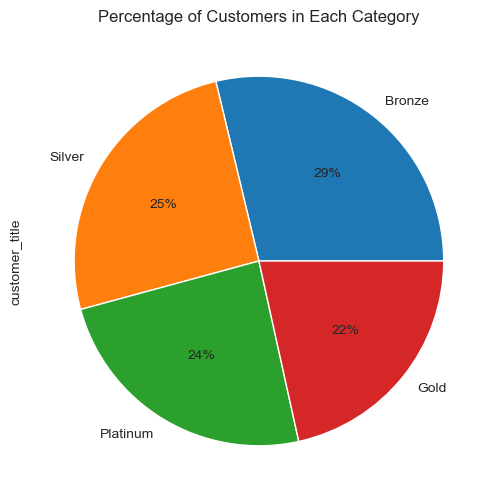

In [48]:
plt.figure(figsize=(10,6))
plt.title("Percentage of Customers in Each Category")
rfm_table["customer_title"].value_counts().plot(kind= "pie", autopct= "%1.0f%%");

#The highest percentage of customers falls in the "Bronze category" 
#i.e Very Low Recency, Very Low Frequency, Very Small Amount Spent
#The goal is to do an exploratory analysis to increase the percentage of customers in "platinum"(best customers)

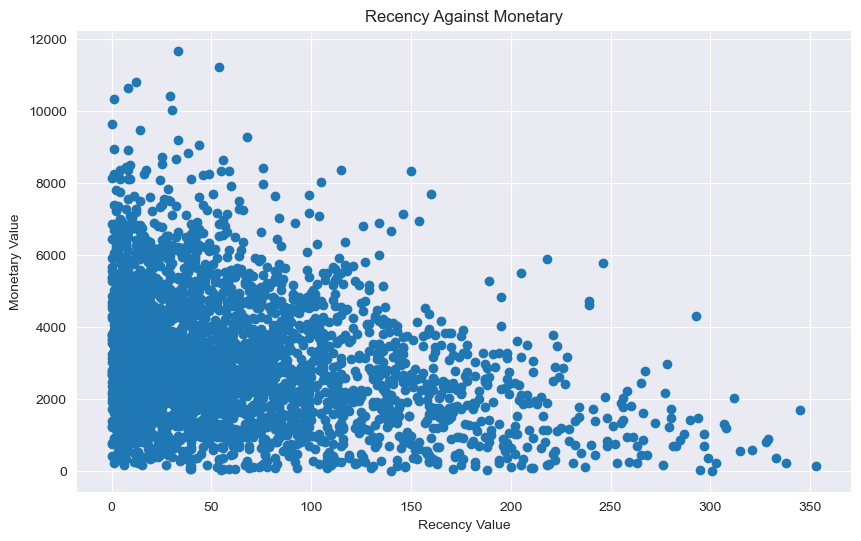

In [49]:
plt.figure(figsize=(10,6))
plt.title("Recency Against Monetary")
plt.xlabel("Recency Value")
plt.ylabel("Monetary Value")
plt.scatter(x=df_customers["recency"], y= df_customers["monetary"] );

#Customers who purchased more recently(0-100)generated more revenue than those who visited a while ago
#Those who visited more than 200 days ago generated low revenue

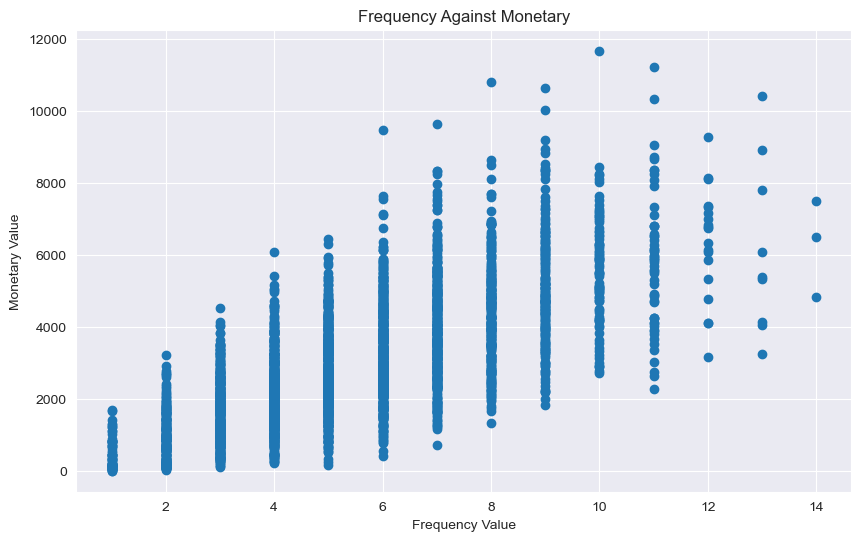

In [50]:
plt.figure(figsize=(10,6))
plt.title("Frequency Against Monetary")
plt.xlabel("Frequency Value")
plt.ylabel("Monetary Value")
plt.scatter(x=df_customers["frequency"], y= df_customers["monetary"] );

#Customers that visited more often i.e 10-14 times generated more revenue. These are the "Platinum" groups.
#customers that hardly visit like 0-4 times generated low revenue.
#There is positive correlation between frequency and monetary gain for the business.

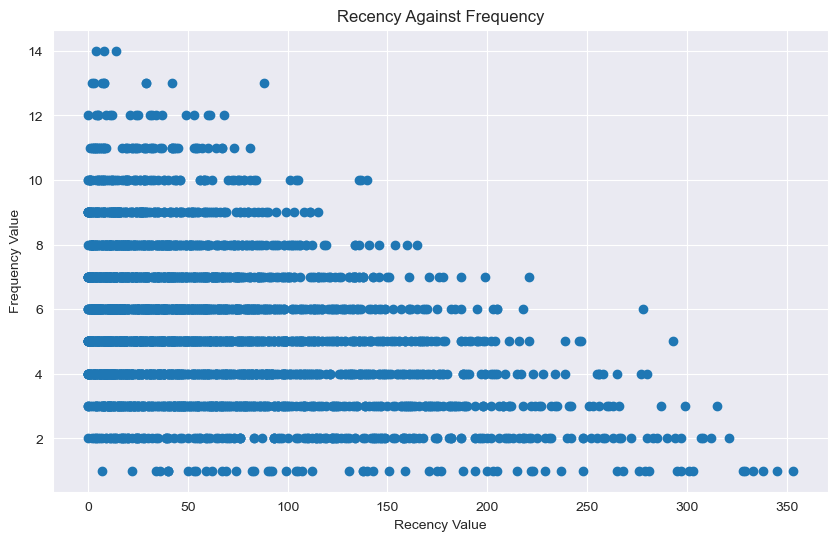

In [51]:
plt.figure(figsize=(10,6))
plt.title("Recency Against Frequency")
plt.xlabel("Recency Value")
plt.ylabel("Frequency Value")
plt.scatter(x=df_customers["recency"], y= df_customers["frequency"] );

#Customers that have visited recently (0-50)days ago have visited more frequently.
#High frequency has a negative relationship with recency values such that recent customers are also frequent customers.

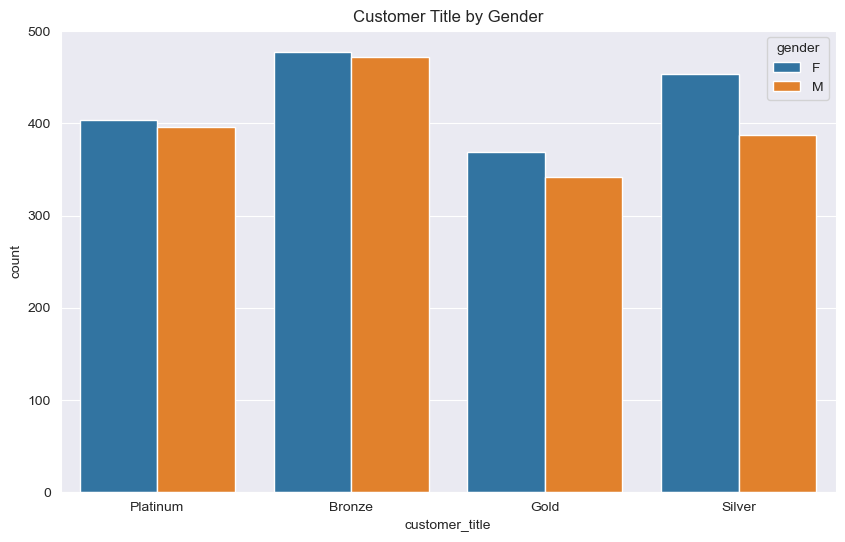

In [52]:
plt.figure(figsize=(10,6))
plt.title("Customer Title by Gender")
sns.countplot(x= df_customers["customer_title"], hue= df_customers["gender"]);

#Female customers patronize more than male in all the category
#Female customers should be target more than the male customers

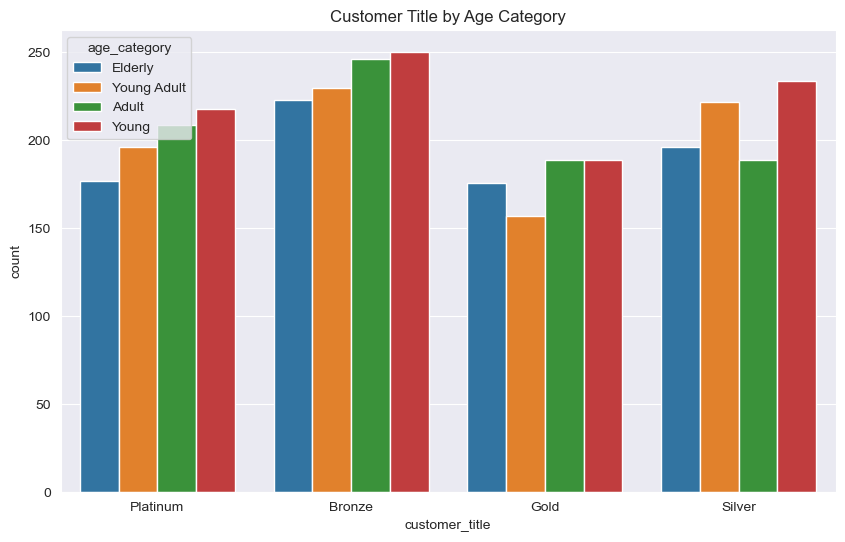

In [53]:
plt.figure(figsize=(10,6))
plt.title("Customer Title by Age Category")
sns.countplot(x= df_customers["customer_title"], hue= df_customers["age_category"]);

#Platinum customers which are the most target customers shows most customers are young i.e below 21yrs
#it is seen that people of young age below 21yrs are the major customers that patronize the business
#Hence, young age category should be targeted

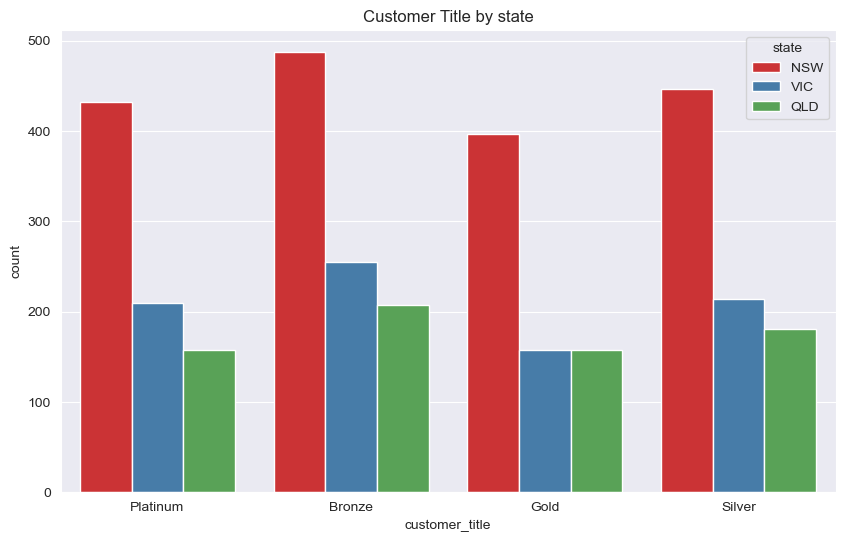

In [54]:
plt.figure(figsize=(10,6))
plt.title("Customer Title by state")
sns.countplot(x= df_customers["customer_title"], hue= df_customers["state"], palette= "Set1");

#Highest population comes from the state "NSW"
#Customers from the state "NSW" should be targeted

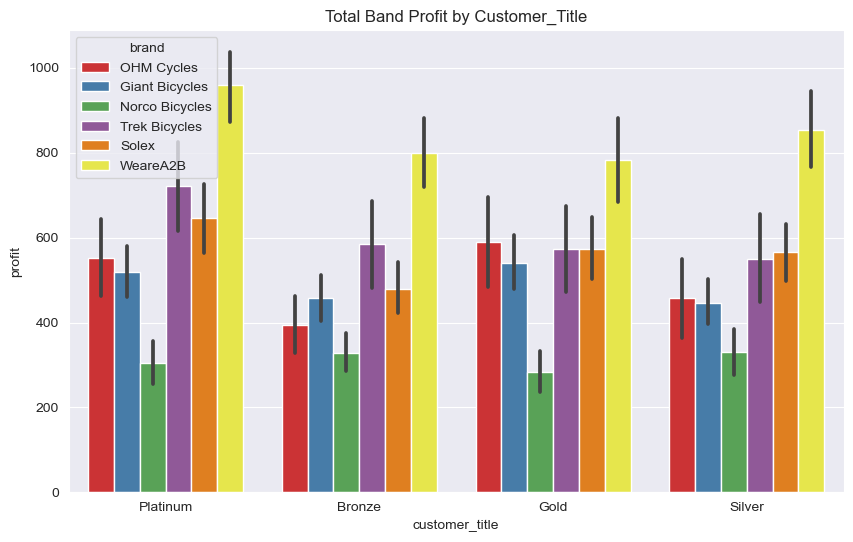

In [55]:
plt.figure(figsize=(10,6))
plt.title("Total Band Profit by Customer_Title")
sns.barplot(x= df_customers["customer_title"], y= df_customers["profit"], hue= df_customers["brand"], palette= "Set1");

#Bicycle brand "WeareA2B" generated more revenue for the business
#"WeareA2B" brand in platinum customers generated the highest profit hence, should be the target brand for the business
#Bicycle brand "Norco Bicycles" generated lowest profit in the business

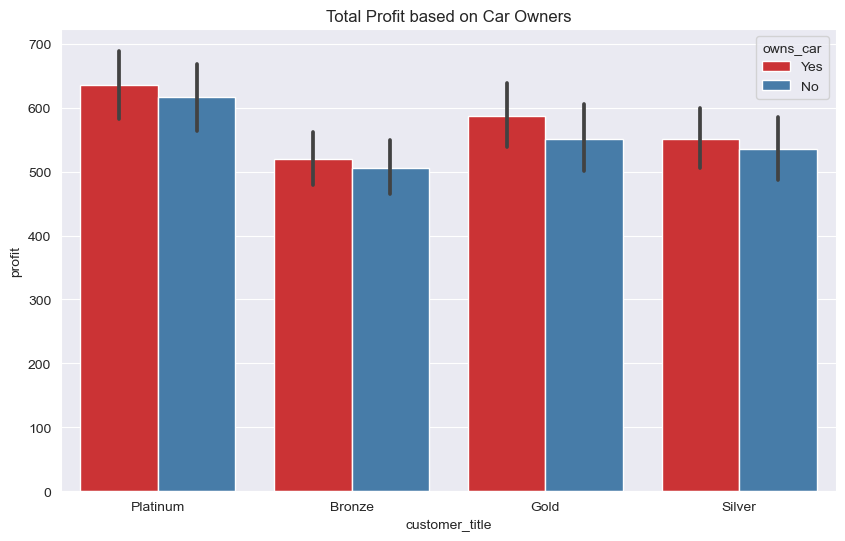

In [56]:
plt.figure(figsize=(10,6))
plt.title("Total Profit based on Car Owners")
sns.barplot(x= df_customers["customer_title"], y= df_customers["profit"], hue= df_customers["owns_car"], palette= "Set1");

#Customers with cars generated more revenue than those without cars
#owning cars can be a factor to be considered to target more income.

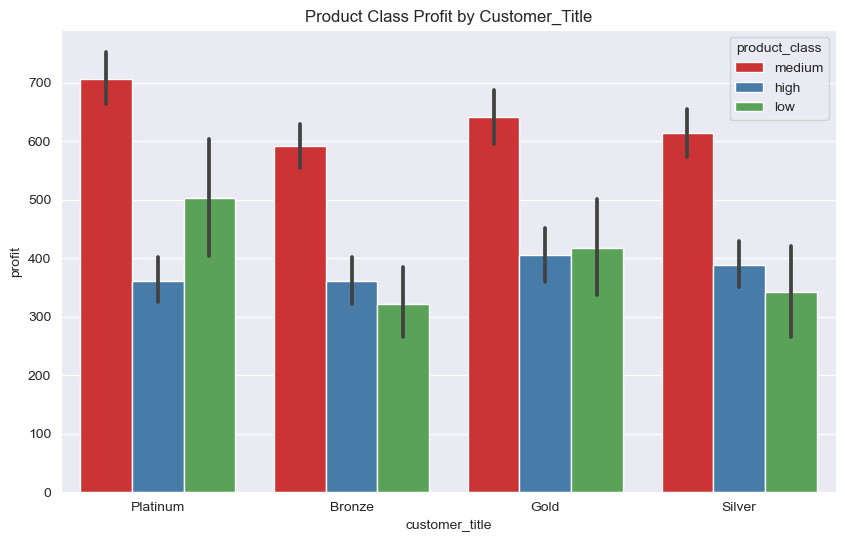

In [57]:
plt.figure(figsize=(10,6))
plt.title("Product Class Profit by Customer_Title")
sns.barplot(x= df_customers["customer_title"], y= df_customers["profit"], hue= df_customers["product_class"], palette= "Set1");


#It is seen that Medium class products generate more revenue in all the customers category.
#Medium class products should be targted.

# CONCLUSION
1000 customers to be targeted and their deatils are extracted in the dataset named target_customers

There is positive correlation between frequency and monetary gain for the business.

High frequency has a negative relationship with recency values such that recent customers are also frequent customers.

Female customers should be target more than the male customers.

Customers of young age category (below 21 years) should be targeted.

Customers from the state "NSW" should be targeted.

Bicycle brand "WeareA2B" generated more revenue for the business.

owning cars can be a factor to be considered to target more income.

Medium class products generate the most profit.